In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [ ]:
import pandas as pd
clean_df = pd.read_csv("/content/Clean.csv")

In [ ]:
corpus = list(clean_df['headline'])

# Count Vectorizers

In [ ]:
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()
y = clean_df.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 0)

In [ ]:
y

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
mx_w = 32
cnn = Sequential()

cnn.add(Embedding(15726 , 8, input_length=mx_w))
cnn.add(Conv1D(8, 3, padding='same', activation='relu'))
cnn.add(MaxPooling1D())
cnn.add(Flatten())
cnn.add(Dense(16, activation='relu'))
cnn.add(Dense(12, activation='relu'))
cnn.add(Dense(8, activation='relu'))
cnn.add(Dense(4, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 8)             125808    
                                                                 
 conv1d (Conv1D)             (None, 32, 8)             200       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 8)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                        

In [ ]:
x_train = sequence.pad_sequences(x_train, maxlen=mx_w)
x_test = sequence.pad_sequences(x_test, maxlen=mx_w)

history = cnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128, verbose=2)
scores = cnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
202/202 - 3s - loss: 0.6922 - accuracy: 0.5198 - val_loss: 0.6922 - val_accuracy: 0.5217 - 3s/epoch - 15ms/step
Epoch 2/5
202/202 - 1s - loss: 0.6921 - accuracy: 0.5238 - val_loss: 0.6923 - val_accuracy: 0.5217 - 1s/epoch - 7ms/step
Epoch 3/5
202/202 - 1s - loss: 0.6921 - accuracy: 0.5238 - val_loss: 0.6923 - val_accuracy: 0.5217 - 1s/epoch - 7ms/step
Epoch 4/5
202/202 - 1s - loss: 0.6921 - accuracy: 0.5238 - val_loss: 0.6922 - val_accuracy: 0.5217 - 1s/epoch - 7ms/step
Epoch 5/5
202/202 - 1s - loss: 0.6921 - accuracy: 0.5238 - val_loss: 0.6923 - val_accuracy: 0.5217 - 1s/epoch - 7ms/step
Accuracy: 52.17%


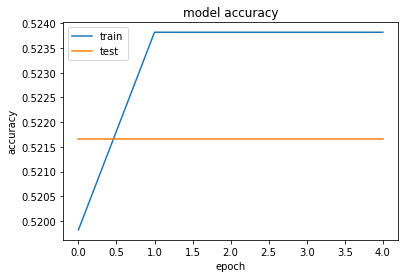

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

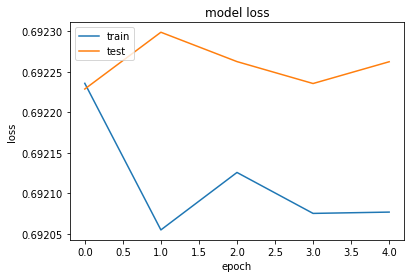

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Tfidf Vectorizer

In [ ]:
tfdf = TfidfVectorizer(max_df=.65, min_df=1, stop_words=None, use_idf=True, norm=None)
x = tfdf.fit_transform(corpus).toarray()
y = clean_df.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 0)

In [ ]:
x_train = sequence.pad_sequences(x_train, maxlen=mx_w)
x_test = sequence.pad_sequences(x_test, maxlen=mx_w)

history = cnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128, verbose=2)
scores = cnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Hashing Vectorizer

In [ ]:
hsh = HashingVectorizer(n_features=2**4)
x = hsh.fit_transform(corpus).toarray()
y = clean_df.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 0)

In [ ]:
x_train = sequence.pad_sequences(x_train, maxlen=mx_w)
x_test = sequence.pad_sequences(x_test, maxlen=mx_w)

history = cnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128, verbose=2)
scores = cnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()